In [14]:
import sys
from sigmath3 import *
from scipy.signal import savgol_filter

# from numpy.signal import savgol_filter

from numpy.fft import ifft, fft, fftshift


def _signed_value(value, bit_count):
    if value > 2**(bit_count - 1) - 1:
        value -= 2**bit_count 

    return value



def _load_hex_file(filepath):
    with open(filepath) as bootprogram:
        lines = bootprogram.readlines()

    words = [int(l,16) for l in lines]

    rf = []
    for w in words:
        real = _signed_value(w&0xffff, 16)
        imag = _signed_value((w >> 16) & 0xffff, 16)
        rf.append(np.complex(real,imag))
        # print "r", real, " i ", imag
        # print rf[0]
        # sys.exit(0)
    return rf



In [15]:
# in units of frames
samples = 100000

# delete from the front, in units of frames
start = 6000


# in units of sampels
rf = read_rf_grc("data/grav3_dump0.raw", 64*samples);


off0 = 6

# downsample by 64, also adding a channel offset to extract samples from only 1 channel
slice0 = rf[off0::64]

# trim the channel from the front
slice0 = slice0[start:]



In [16]:


flen = 1021
forder = 1


filt0_r = savgol_filter(np.real(slice0), flen, forder, mode='mirror')
filt0_i = savgol_filter(np.imag(slice0), flen, forder, mode='mirror')

# filt1 = savgol_filter(np.real(slice0), 511, 2, mode='nearest')
# filt2 = savgol_filter(np.real(slice0), 511, 2, mode='constant')
# filt3 = savgol_filter(np.real(slice0), 511, 2, mode='wrap')

filt0 = [np.complex(filt0_r[i],filt0_i[i]) for i in range(len(filt0_r))]

# nplot(slice0, "real only")
# nplot(filt0, "f0", False)

# nplot(filt1, "f1", False)
# nplot(filt2, "f2", False) # weird up and down
# nplot(filt3, "f3", False)

if False:
	fname = "dump0_ch_6_flen_1010_o_1"
	save_rf_grc("../data/" + fname + "_filt.raw", filt0)
	save_rf_grc("../data/" + fname + "_src.raw", slice0)
	exit(0)


In [7]:
def our_iir(x, state, g):
    st = state[0]
#     print(state[0])
    out = [None]*len(x)
    
    for i in range(len(x)):
        s = x[i]
        out[i] = s + (g*(st - s))
        st = out[i]
        
    state[0] = st
    return out
    pass

save_state = [0.12+0.02j]
filt1_a = our_iir(slice0, save_state, 0.999)
filt1_b = np.array(filt1_a) - np.array(slice0)
filt1 = slice0 - filt1_b
# filt1 = our_iir(filt1_a, save_state, 0.1)
# print(foo)

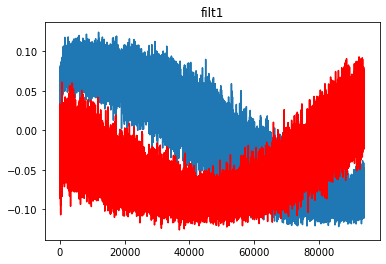

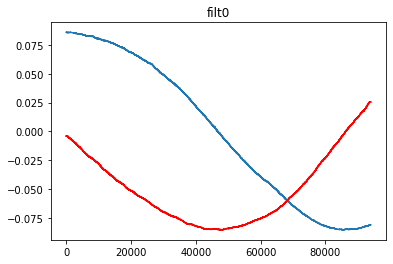

In [8]:
ncplot(filt1, "filt1"); nplotshow()
ncplot(filt0, "filt0"); nplotshow()

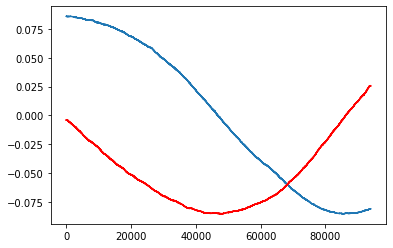

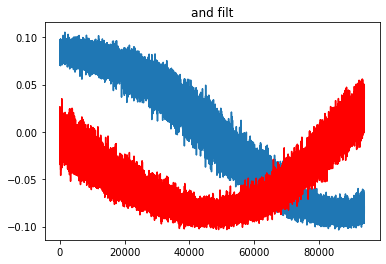

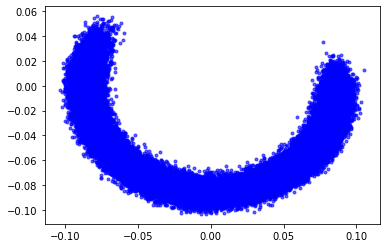

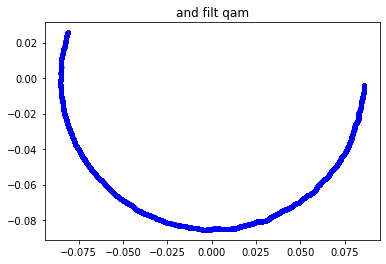

In [12]:
ncplot(filt0); nplotshow()
ncplot(slice0, "and filt"); nplotshow()


nplotqam(slice0); nplotshow()
nplotqam(filt0, "and filt qam"); nplotshow()



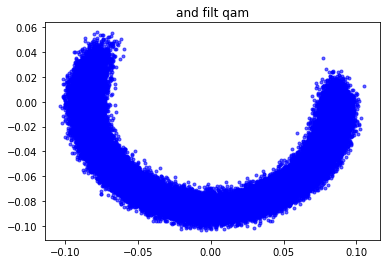

In [10]:
nplotqam(slice0)
nplotqam(filt0, "and filt qam", False)